In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
#1. Find the linear regression equation for this data.
# Chirps/Sec = m*(Gr. Temp.) + c
from sklearn.linear_model import LinearRegression
X = df[["Ground Temperature"]]
y = df["Chirps/Second"]
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_

(array([0.20299973]), 0.45931464523595267)

So, my linear regression model is:

Chrips/Sec = 0.203*(Gr. Temp) + 0.459

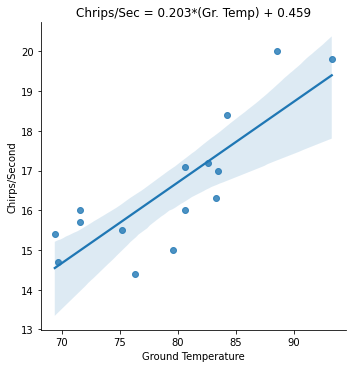

In [ ]:
# Chart the original data and the equation on the chart.
sns.lmplot(x="Ground Temperature", y="Chirps/Second", data=df)
plt.title('Chrips/Sec = 0.203*(Gr. Temp) + 0.459')
plt.show()

In [ ]:
# Find the equation's R2 score (use the .score method) to determine 
# whether the equation is a good fit for this data. 
# (0.8 and greater is considered a strong correlation.)
from sklearn.metrics import r2_score
y_pred = model.predict(X)
print('R2- SCORE:', r2_score(y,y_pred))

R2- SCORE: 0.6922946529146998


In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


Ans: As the R2 score is greater than 0.4, we can call it a good model. And the correlation value between Chirps/Sec and Gr. Temp is 0.83. So, there is a strong correlation between the feature and the target.

In [ ]:
# Check R2= Cor**2
.832042**2

0.6922938897639999

In [ ]:
# Extrapolate data: If the ground temperature reached 95, 
# then at what approximate rate would you expect the crickets to be chirping?
Chirp_95 = model.predict([[95]])
Chirp_95

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

Ans: Crickets would chirp at 19.7 Chirps/Sec at 95 degree F.

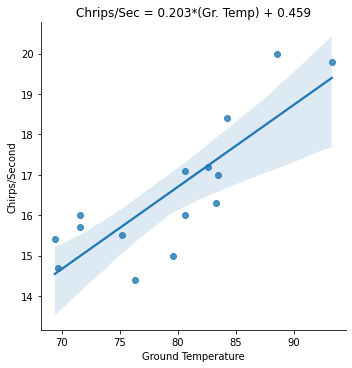

In [ ]:
# Interpolate data: With a listening device, you discovered that 
# on a particular morning the crickets were chirping at a rate of 18 chirps per second. 
# What was the approximate ground temperature that morning? 
sns.lmplot(x="Ground Temperature", y="Chirps/Second", data=df)
plt.title('Chrips/Sec = 0.203*(Gr. Temp) + 0.459')
plt.show()

In [ ]:
# From the regresion Formula:
#Temp_18 = (18 - 0.45931464523595267)/0.20299973
Temp_18 = (18-model.intercept_)/model.coef_
Temp_18

array([86.40743135])

Ans: Temperature was approximately 86.4 deg F.

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [1]:
!ls

brain_body.txt	sample_data


In [40]:
df = pd.read_fwf("brain_body.txt")

In [41]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [42]:
df.shape

(62, 2)

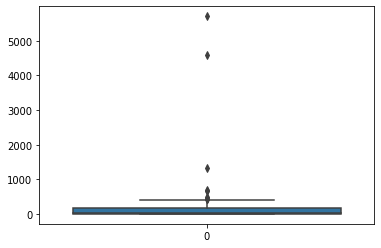

In [43]:
sns.boxplot(data=df.Body);

In [44]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [45]:
Upper = 1.5*(166-4.25)+166
Upper

408.625

In [46]:
#Drop data having body-weight greater than Upper
#df = df[df["Body"]<Upper]

In [47]:
#1. Find the linear regression equation for this data for brain weight to body weight.
from sklearn.linear_model import LinearRegression
X = df[["Body"]]
y = df["Brain"]
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_

(array([0.90291295]), -56.85554542859637)

Ans: Brain WT = 0.903*(Body WT) - 56.856

In [48]:
df["Brain_Fitted"] = model.predict(X)

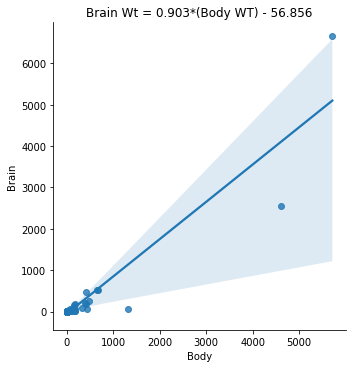

In [49]:
#2. Chart the original data and the equation on the chart.
sns.lmplot(x="Body", y="Brain", data=df)
plt.title('Brain Wt = 0.903*(Body WT) - 56.856')
plt.show()

In [50]:
#3. Find the equation's R2 score (use the .score method) to determine whether the 
# equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
from sklearn.metrics import r2_score
y_pred = model.predict(X)
print('R2- SCORE:', r2_score(y,y_pred))

R2- SCORE: 0.8726620843043331


In [39]:
df.corr()

,Brain,Body,Brain_Fitted
Brain,1.000000,0.799676,0.799676
Body,0.799676,1.000000,1.000000
Brain_Fitted,0.799676,1.000000,1.000000


In [ ]:
0.934164**2

0.872662378896

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
!ls

salary.txt  sample_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
#1. Find the linear regression equation for this data using columns 1-5 to column 6.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Feature and Target selection
X = df.drop("Salary", axis=1)
y = df["Salary"]
print(X.shape, y.shape)

# Model building
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(model.coef_, model.intercept_)
print(print('R2- SCORE:', r2_score(y,y_pred)))

(52, 5) (52,)
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] 11410.14654725559
R2- SCORE: 0.8547180674410969
None


Salary = 1241.8*Sex + 5586.2*Rank + 482.9*Year -1331.6*Degree -128.8*YSdeg + 11410.1

In [ ]:
#2. Find the selection of columns with the best R2 score.
df.corr()["Salary"]

Sex      -0.252782
Rank      0.867488
Year      0.700669
Degree   -0.069726
YSdeg     0.674854
Salary    1.000000
Name: Salary, dtype: float64

Ans: Apart from "Degree" all other features are important.

In [ ]:
#3. Report whether sex is a factor in salary.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
X = df.drop("Salary", axis=1)
y = df["Salary"]
print(X.shape, y.shape)

# Standard Scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

# Model Fitting
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(model.coef_, model.intercept_)
print(print('R2- SCORE:', r2_score(y,y_pred)))

(52, 5) (52,)
[  550.80960505  4770.51372805  2633.67272974  -633.52028413
 -1303.82049378] 23797.653846153848
R2- SCORE: 0.8547180674410969
None


Ans: The coefficient corresponding to the scaled Sex feature is 550.8 which is a significant number. So, sex is an imporant feature for the salary determination.